# 1 Monte Carlo Simulation
## 1.2 Data Cration and Visualization

In [356]:
import numpy as np
import matplotlib.pyplot as plt

In [357]:
def create_data(N):
    # Create N uniformly distributed random numbers
    U = np.random.rand(N)
    
    # Get the X variables with the respective distribution
    X0 = 1 - np.sqrt(1-U)
    X1 = np.sqrt(U)
    
    # Create N random numbers 0 or 1 with probability 0.5
    Y = np.random.rand(N)
    Y[Y < 0.5] = 0
    Y[Y >= 0.5] = 1
    
    # Pick a random X0 when Y=0
    # Pick a random X1 when Y=1
    X = X0
    X[Y == 1] = X1[Y == 1]

    return [X, Y]

In [358]:
#Define Threshold classifier A
def thresh_class_A(x,t):
    y=1
    if x<t:
        y=0
    return y

#Define Thresshold Classifier B
def thresh_class_B(x,t):
    y=1
    if x >= t:
        y=0
    return y

#Calculate Error of A and B for different thresholds and same Data set
def calc_error(data_set,thresh):
    #empty arrays to append results
    error_res = np.array([[],[]])
    
    #run over different thresholds
    for t in thresh:
        error = np.array([[0],[0]])
        
        #run over all points of the dataset
        for i in range(len(data_set[0])):
            #check wether classifier A gives wrong result and count errors
            if thresh_class_A(data_set[0][i],t) != data_set[1][i]:
                error[0][0] += 1
            #same for classifier B
            if thresh_class_B(data_set[0][i],t) != data_set[1][i]:
                error[1][0] += 1
        
        #append data
        error_res = np.append(error_res,error,axis=1)
    
    #calculate probability and return data
    return error_res/len(data_set[0])



In [359]:
#analytic errorfunction of classifier A for different thresholds
def calc_error_analytic_A(thresh):
    error_ana = np.array([])
    for t in thresh:
        error_ana = np.append(error_ana,0.25+(t-0.5)**2)
    return error_ana

#same for classifier B
def calc_error_analytic_B(thresh):
    error_ana = np.array([])
    for t in thresh:
        error_ana = np.append(error_ana,0.75-(t-0.5)**2)
    return error_ana

In [360]:
#define threshold
thresh = [0.2,0.5,0.6]

In [361]:
#define size of dataset
M = [10,100,1000,10000]

#arrays to store result
error_res_A = np.zeros((len(M),len(thresh),10))
error_res_B = np.zeros((len(M),len(thresh),10))

#run over all dataset sizes
for i in range(len(M)):
    error_res10_A = np.zeros((10,len(thresh)))
    error_res10_B = np.zeros((10,len(thresh)))
    
    #run over all thresholds
    for j in range(10):
        #calculate corresponding error probability
        error_res10_A[j]=calc_error(create_data(M[i]),thresh)[0]
        error_res10_B[j]=calc_error(create_data(M[i]),thresh)[1]
    
    #write in an array
    error_res_A[i] = error_res10_A.T
    error_res_B[i] = error_res10_B.T



In [363]:
#Calculate Mean value and standard deviation

mean_std_A = np.zeros((len(M),len(thresh),2))
mean_std_B = np.zeros((len(M),len(thresh),2))

#run overall dataset sizes
for i in range(len(M)):
    #run over all threshholds
    for j in range(len(thresh)):
        #calculate mean and standard deviation
        mean_std_A[i,j] = np.array([np.mean(error_res_A[i,j]),np.std(error_res_A[i,j])])*100
        mean_std_B[i,j] = np.array([np.mean(error_res_B[i,j]),np.std(error_res_B[i,j])])*100


So far we calculated the error probability of 4 different dataset sizes (10,100,1000,10000) for three different thresholds (0.2,0.5,0.6). We stored the corresponing mean value and standard deviation for 10 different datasets. In the following two graphs we plot the mean value with its standard deviation as errorbar against the size of the dataset.

We see espacially for larger datasets (M>100) that the red classifier with threshold $x_t=0.5$ has the lowest error probability. It converges to $p=25 \%$.

Also the other thresholds $x_t=0.6$ and $x_t=0.2$ converge to its corresponding analytical value $p=34 \%$ and $p=26 \%$.

Analytical probability error for x_t=[0.2,0.5,0.6]: [0.34 0.25 0.26]


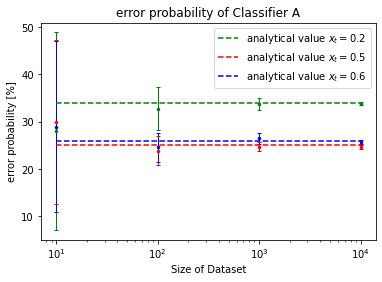

In [369]:
print("Analytical probability error for x_t=[0.2,0.5,0.6]:",calc_error_analytic_A(thresh))

#plot the Error probability of different threshold parameters against the dataset size
plt.errorbar(M,mean_std_A[:,0,0],yerr=mean_std_A[:,0,1],fmt=".",color="g",elinewidth=1, capsize=2, capthick=1, markersize=5)
plt.errorbar(M,mean_std_A[:,1,0],yerr=mean_std_A[:,1,1],fmt=".",color="r",elinewidth=1, capsize=2, capthick=1, markersize=5)
plt.errorbar(M,mean_std_A[:,2,0],yerr=mean_std_A[:,2,1],fmt=".",color="b",elinewidth=1, capsize=2, capthick=1, markersize=5)

#analytical result
plt.plot([10,10000],[34,34],"--",color="g", label="analytical value $x_t = 0.2$")
plt.plot([10,10000],[25,25],"--",color="r", label="analytical value $x_t = 0.5$")
plt.plot([10,10000],[26,26],"--",color="b", label="analytical value $x_t = 0.6$")

plt.xscale("log")
plt.ylabel("error probability [%]")
plt.xlabel("Size of Dataset")
plt.title("error probability of Classifier A")
plt.legend()

Also for Classifier B the three thresholds converge to its analytical value.

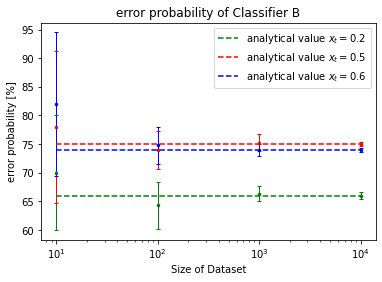

In [371]:
plt.errorbar(M,mean_std_B[:,0,0],yerr=mean_std_B[:,0,1],fmt=".",color="g",elinewidth=1, capsize=2, capthick=1, markersize=5)
plt.errorbar(M,mean_std_B[:,1,0],yerr=mean_std_B[:,1,1],fmt=".",color="r",elinewidth=1, capsize=2, capthick=1, markersize=5)
plt.errorbar(M,mean_std_B[:,2,0],yerr=mean_std_B[:,2,1],fmt=".",color="b",elinewidth=1, capsize=2, capthick=1, markersize=5)
plt.plot([10,10000],[66,66],"--",color="g", label="analytical value $x_t = 0.2$")
plt.plot([10,10000],[75,75],"--",color="r", label="analytical value $x_t = 0.5$")
plt.plot([10,10000],[74,74],"--",color="b", label="analytical value $x_t = 0.6$")
plt.xscale("log")
plt.ylabel("error probability [%]")
plt.xlabel("Size of Dataset")
plt.title("error probability of Classifier B")
plt.legend()

The standard deviation decreases with the Dataset size exponentially because we ccould easily fit an exponential decay through the received data.

Text(0, 0.5, 'Standard deviation [%]')

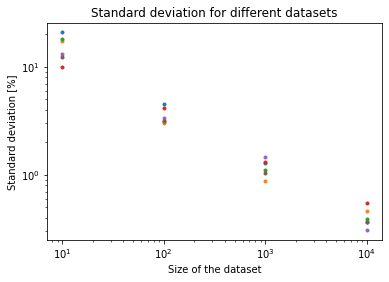

In [375]:
#plot the standard deviation for different sizes of the dataset

plt.plot(M,mean_std_A[:,0,1],".")
plt.plot(M,mean_std_A[:,1,1],".")
plt.plot(M,mean_std_A[:,2,1],".")
plt.plot(M,mean_std_B[:,0,1],".")
plt.plot(M,mean_std_B[:,1,1],".")
plt.plot(M,mean_std_B[:,2,1],".")
plt.yscale("log")
plt.xscale("log")
plt.title("Standard deviation for different datasets")
plt.xlabel("Size of the dataset")
plt.ylabel("Standard deviation [%]")